In [ ]:
import numpy as np
import scipy.io as sio
import nirpy
probinfo = sio.loadmat('C:/Users/AYUSH/Downloads/2023-02-15_001_MC_003/2023-02-15_001_MC_003/NIRS-2023-02-15_001_probeInfo.mat')
# config = np.loadtxt('C:/Users/AYUSH/Downloads/2023-02-15_001_MC_003/2023-02-15_001_MC_003/NIRS-2023-02-15_001_config.txt')
wl1 = np.loadtxt('C:/Users/AYUSH/Downloads/2023-02-15_001_MC_003/2023-02-15_001_MC_003/NIRS-2023-02-15_001.wl1', delimiter = ',')
wl2 = np.loadtxt('C:/Users/AYUSH/Downloads/2023-02-15_001_MC_003/2023-02-15_001_MC_003/NIRS-2023-02-15_001.wl2', delimiter = ',')
events = np.loadtxt('C:/Users/AYUSH/Downloads/2023-02-15_001_MC_003/2023-02-15_001_MC_003/NIRS-2023-02-15_001.evt')
data = sio.loadmat('C:/Users/AYUSH/Downloads/2023-02-15_001_MC_003/2023-02-15_001_MC_003/NIRS-2023-02-15_001.nirs')
# data.plot()




In [ ]:
np.shape(data['d'])


(20825, 36)

In [ ]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed Feb 15 15:20:35 2023',
 '__version__': '1.0',
 '__globals__': [],
 'SD': array([[(array([[1, 1, 1, 1],
                [2, 1, 1, 1],
                [2, 2, 1, 1],
                [3, 1, 1, 1],
                [3, 3, 1, 1],
                [4, 1, 1, 1],
                [4, 2, 1, 1],
                [4, 3, 1, 1],
                [4, 4, 1, 1],
                [5, 5, 1, 1],
                [5, 6, 1, 1],
                [5, 7, 1, 1],
                [5, 8, 1, 1],
                [6, 6, 1, 1],
                [6, 8, 1, 1],
                [7, 7, 1, 1],
                [7, 8, 1, 1],
                [8, 8, 1, 1],
                [1, 1, 1, 2],
                [2, 1, 1, 2],
                [2, 2, 1, 2],
                [3, 1, 1, 2],
                [3, 3, 1, 2],
                [4, 1, 1, 2],
                [4, 2, 1, 2],
                [4, 3, 1, 2],
                [4, 4, 1, 2],
                [5, 5, 1, 2],
                

In [ ]:
data['t']

array([[1.280000e-01],
       [2.560000e-01],
       [3.840000e-01],
       ...,
       [2.665344e+03],
       [2.665472e+03],
       [2.665600e+03]])

data[

In [ ]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed Feb 15 15:20:35 2023',
 '__version__': '1.0',
 '__globals__': [],
 'SD': array([[(array([[1, 1, 1, 1],
                [2, 1, 1, 1],
                [2, 2, 1, 1],
                [3, 1, 1, 1],
                [3, 3, 1, 1],
                [4, 1, 1, 1],
                [4, 2, 1, 1],
                [4, 3, 1, 1],
                [4, 4, 1, 1],
                [5, 5, 1, 1],
                [5, 6, 1, 1],
                [5, 7, 1, 1],
                [5, 8, 1, 1],
                [6, 6, 1, 1],
                [6, 8, 1, 1],
                [7, 7, 1, 1],
                [7, 8, 1, 1],
                [8, 8, 1, 1],
                [1, 1, 1, 2],
                [2, 1, 1, 2],
                [2, 2, 1, 2],
                [3, 1, 1, 2],
                [3, 3, 1, 2],
                [4, 1, 1, 2],
                [4, 2, 1, 2],
                [4, 3, 1, 2],
                [4, 4, 1, 2],
                [5, 5, 1, 2],
                

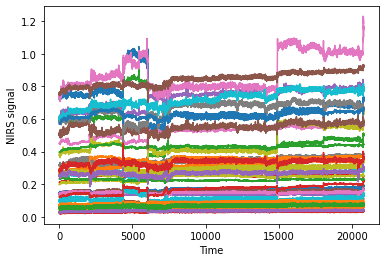

In [ ]:
import matplotlib.pyplot as plt
nirs_data = data['d']  # Assuming the NIRS data is in the third element of SD

# Plot the time series of the data
plt.plot(np.arange(len(nirs_data)), nirs_data)
plt.xlabel('Time')
plt.ylabel('NIRS signal')
plt.show()

In [ ]:
type(nirs_data)

numpy.ndarray

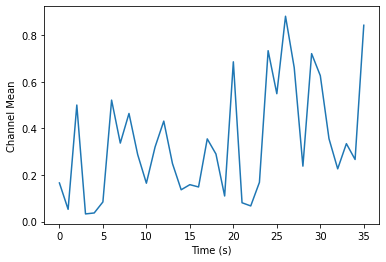

Baseline shift detected.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
# Calculate the mean value of each channel
channel_means = np.mean(nirs_data, axis=0)

# Plot the mean values as a time series
plt.plot(channel_means)
plt.xlabel('Time (s)')
plt.ylabel('Channel Mean')
plt.show()

# Perform a t-test to compare the mean values between the first and second halves of the data
t_statistic, p_value = stats.ttest_rel(channel_means[:len(channel_means)//2], channel_means[len(channel_means)//2:])

if p_value < 0.05:
    print('Baseline shift detected.')
else:
    print('No baseline shift detected.')


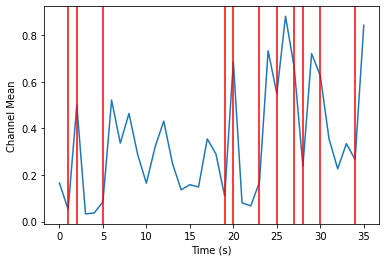

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Calculate the mean value of each channel
channel_means = np.mean(nirs_data, axis=0)

# Plot the mean values as a time series
plt.plot(channel_means)
plt.xlabel('Time (s)')
plt.ylabel('Channel Mean')

# Perform a t-test to compare the mean values between the first and second halves of the data
t_statistic, p_value = stats.ttest_rel(channel_means[:len(channel_means)//2], channel_means[len(channel_means)//2:])

# If a significant difference is found, plot vertical lines at the time points where the shifts occur
if p_value < 0.05:
    shift_points = np.where(np.abs(np.diff(channel_means)) > np.std(channel_means))[0]
    for shift_point in shift_points:
        plt.axvline(x=shift_point, color='r')

plt.show()


Text(0.5, 0, 'Sample')

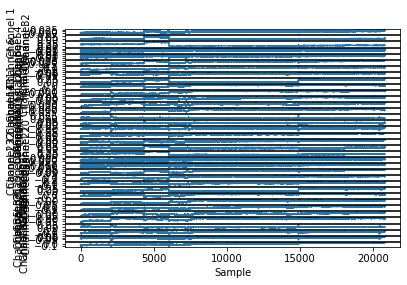

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute baseline for each channel using median
baseline = np.median(nirs_data, axis=0)

# Compute difference between each sample and baseline
diff = nirs_data - baseline

# Create a figure with subplots for each channel
fig, axs = plt.subplots(nrows=nirs_data.shape[1], sharex=True)

# Iterate over each channel and plot the baseline shifts
for i in range(nirs_data.shape[1]):
    axs[i].plot(diff[:, i])
    axs[i].set_ylabel(f'Channel {i+1}')

# Add a common x-axis label
plt.xlabel('Sample')



In [ ]:
pip install BaselineRemoval

Note: you may need to restart the kernel to use updated packages.


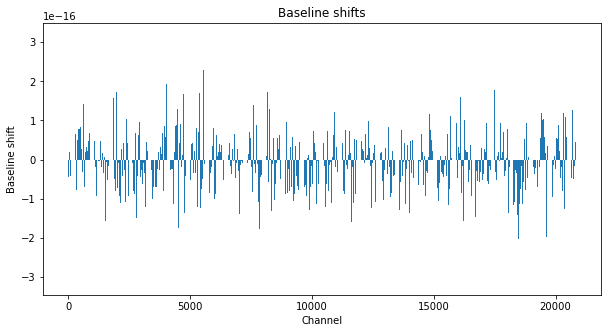

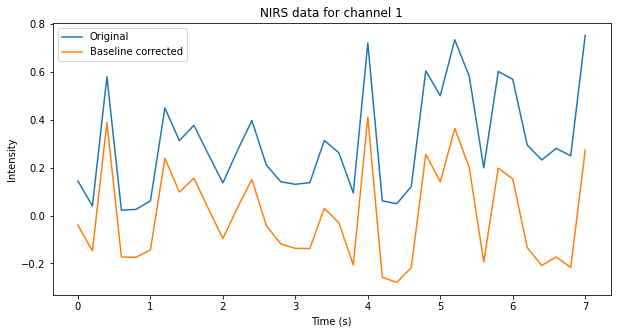

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


# define a baseline function to fit the baseline of each channel
def baseline_func(x, a, b, c):
    return a*x**2 + b*x + c

# create an array of time points for the NIRS data (assuming data is sampled at 10 Hz)
time_points = np.arange(nirs_data.shape[1])/5

# initialize arrays for baseline-corrected data and baseline shifts
nirs_data_bc = np.zeros_like(nirs_data)
baseline_shifts = np.zeros(nirs_data.shape[0])

# loop over each channel and correct baseline
for i in range(nirs_data.shape[0]):
    # fit a quadratic polynomial to the baseline
    p = np.polyfit(time_points, nirs_data[i], 2)
    baseline = np.polyval(p, time_points)

    # find the baseline shift and store it in the array
    baseline_shifts[i] = np.mean(nirs_data[i] - baseline)

    # subtract the baseline from the data
    nirs_data_bc[i] = nirs_data[i] - baseline

# plot the baseline shifts
plt.figure(figsize=(10,5))
plt.bar(np.arange(nirs_data.shape[0]), baseline_shifts)
plt.xlabel('Channel')
plt.ylabel('Baseline shift')
plt.title('Baseline shifts')

# plot the original and baseline-corrected data for the first channel
plt.figure(figsize=(10,5))
plt.plot(time_points, nirs_data[0], label='Original')
plt.plot(time_points, nirs_data_bc[0], label='Baseline corrected')
plt.xlabel('Time (s)')
plt.ylabel('Intensity')
plt.title('NIRS data for channel 1')
plt.legend()



In [ ]:
from BaselineRemoval import BaselineRemoval

input_array=nirs_data[0]
polynomial_degree=2 #only needed for Modpoly and IModPoly algorithm

baseObj=BaselineRemoval(input_array)
Modpoly_output=baseObj.ModPoly(polynomial_degree)
Imodpoly_output=baseObj.IModPoly(polynomial_degree)
Zhangfit_output=baseObj.ZhangFit()

print('Original input:',input_array)
print('Modpoly base corrected values:',Modpoly_output)
print('IModPoly base corrected values:',Imodpoly_output)
print('ZhangFit base corrected values:',Zhangfit_output)



WARING max iteration reached!
Original input: [0.1442527 0.0402901 0.5799996 0.0225175 0.0258887 0.0613263 0.4491262
 0.3128056 0.3770362 0.2553205 0.1366993 0.2709159 0.3970874 0.2110281
 0.1414203 0.1307718 0.1377754 0.31392   0.2622872 0.0948353 0.7210014
 0.0616802 0.0495717 0.1215549 0.6045657 0.5005047 0.734303  0.5813821
 0.1993138 0.6020661 0.569173  0.2946245 0.2325299 0.2807193 0.2499153
 0.7527616]
Modpoly base corrected values: [ 9.46124211e-02  6.10952938e-04  5.49331710e-01 -8.90085377e-05
  1.03936981e-02  5.19929297e-02  4.45004586e-01  3.12945868e-01
  3.80488474e-01  2.61134905e-01  1.43925961e-01  2.78604942e-01
  4.04288948e-01  2.16792279e-01  1.44797235e-01  1.30811616e-01
  1.33528222e-01  3.04435952e-01  2.46616408e-01  7.20278883e-02
  6.90107494e-01  2.17499240e-02 -3.44820737e-04  6.07022594e-02
  5.31827064e-01  4.14930194e-01  6.34942749e-01  4.67286229e-01
  6.95324340e-02  4.55649364e-01  4.05171018e-01  1.12087398e-01
  3.05078022e-02  5.82623316e-02  6.

(20825, 36)
[0.1442527 0.0402901 0.5799996 0.0225175 0.0258887 0.0613263 0.4491262
 0.3128056 0.3770362 0.2553205 0.1366993 0.2709159 0.3970874 0.2110281
 0.1414203 0.1307718 0.1377754 0.31392   0.2622872 0.0948353 0.7210014
 0.0616802 0.0495717 0.1215549 0.6045657 0.5005047 0.734303  0.5813821
 0.1993138 0.6020661 0.569173  0.2946245 0.2325299 0.2807193 0.2499153
 0.7527616]


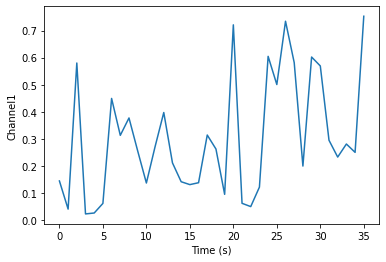

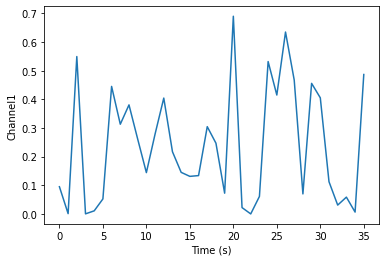

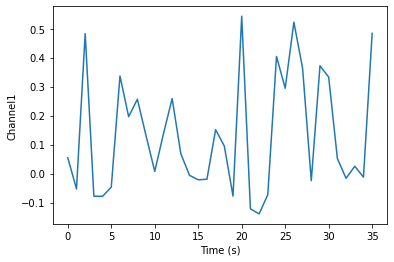

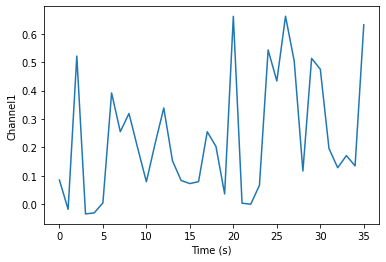

In [ ]:
print(nirs_data.shape)
print(nirs_data[0])

plt.plot(input_array)
plt.xlabel('Time (s)')
plt.ylabel('Channel1')
plt.show()

plt.plot(Modpoly_output)
plt.xlabel('Time (s)')
plt.ylabel('Channel1')
plt.show()
plt.plot(Imodpoly_output)
plt.xlabel('Time (s)')
plt.ylabel('Channel1')
plt.show()
plt.plot(Zhangfit_output)
plt.xlabel('Time (s)')
plt.ylabel('Channel1')
plt.show()

In [ ]:

channel_means = np.mean(nirs_data, axis=0)
from BaselineRemoval import BaselineRemoval

input_array=channel_means
polynomial_degree=2 #only needed for Modpoly and IModPoly algorithm

baseObj=BaselineRemoval(input_array)
Modpoly_output=baseObj.ModPoly(polynomial_degree)
Imodpoly_output=baseObj.IModPoly(polynomial_degree)
Zhangfit_output=baseObj.ZhangFit()

print('Original input:',input_array)
print('Modpoly base corrected values:',Modpoly_output)
print('IModPoly base corrected values:',Imodpoly_output)
print('ZhangFit base corrected values:',Zhangfit_output)


WARING max iteration reached!
Original input: [0.16613392 0.05296723 0.50052386 0.03322122 0.03729931 0.0846029
 0.52169889 0.33723903 0.46437339 0.28794236 0.1650297  0.32053921
 0.4315522  0.2493697  0.13684712 0.15875923 0.14893292 0.35526827
 0.29034898 0.11018623 0.68606187 0.08112777 0.06747026 0.16875563
 0.73380094 0.54919814 0.88166448 0.66116584 0.23828306 0.72123192
 0.6267816  0.35596148 0.22672759 0.33472133 0.26690676 0.8429731 ]
Modpoly base corrected values: [ 1.09455576e-01  4.94970514e-03  4.60294018e-01 -9.40706117e-05
  1.00254363e-02  6.24973061e-02  5.03888437e-01  3.22850585e-01
  4.52533824e-01  2.77778531e-01  1.55668464e-01  3.11107445e-01
  4.21176763e-01  2.37177465e-01  1.21964945e-01  1.40313977e-01
  1.26051452e-01  3.27077462e-01  2.55975688e-01  6.87573188e-02
  6.36704210e-01  2.29682209e-02 -3.64309831e-04  9.03729003e-02
  6.43996914e-01  4.47099684e-01  7.66398463e-01  5.31859120e-01
  9.40624988e-02  5.61224389e-01  4.50113969e-01  1.61760608e-01
 

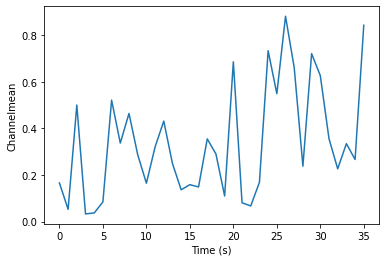

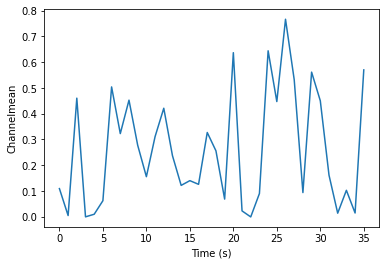

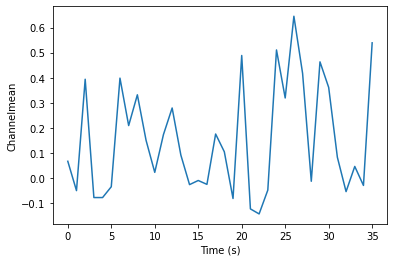

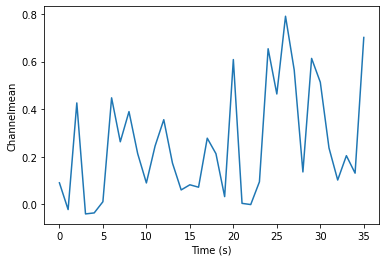

In [ ]:
plt.plot(input_array)
plt.xlabel('Time (s)')
plt.ylabel('Channelmean')
plt.show()

plt.plot(Modpoly_output)
plt.xlabel('Time (s)')
plt.ylabel('Channelmean')
plt.show()
plt.plot(Imodpoly_output)
plt.xlabel('Time (s)')
plt.ylabel('Channelmean')
plt.show()
plt.plot(Zhangfit_output)
plt.xlabel('Time (s)')
plt.ylabel('Channelmean')
plt.show()

Text(0.5, 1.0, 'Corrected Data and Baseline')

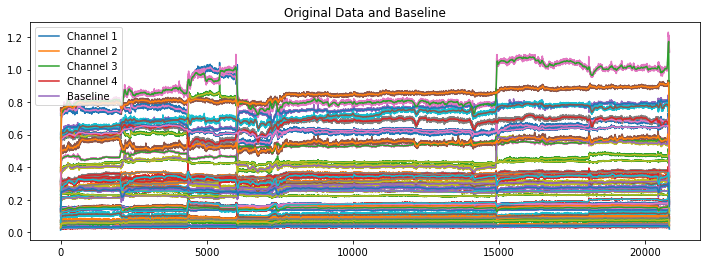

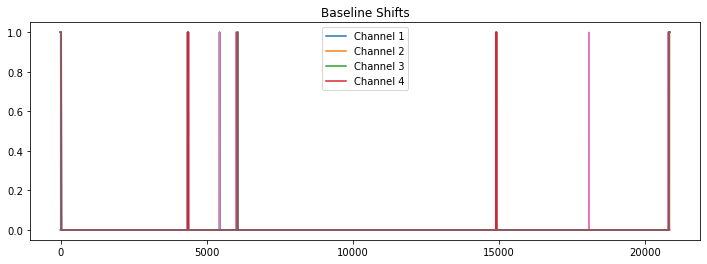

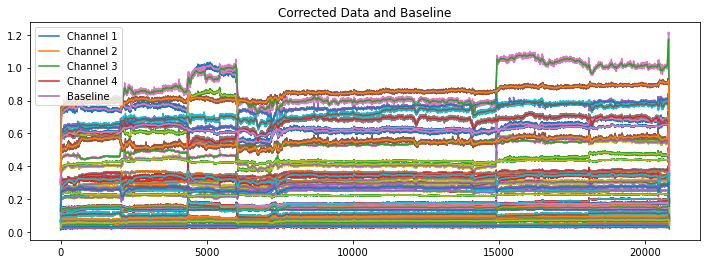

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data= nirs_data

# Set window size and threshold for detecting baseline shifts
window_size = 50
threshold = 0.05

# Compute rolling median for each channel
baseline = np.zeros_like(data)
for i in range(data.shape[1]):
    baseline[:, i] = np.convolve(data[:, i], np.ones(window_size), mode='same') / window_size

# Compute difference between data and baseline
diff = data - baseline

# Detect baseline shifts exceeding threshold
shifts = np.abs(diff) > threshold

# Plot original data and baseline
plt.figure(figsize=(12, 4))
plt.plot(data)
plt.plot(baseline)
plt.legend(['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Baseline'])
plt.title('Original Data and Baseline')

# Plot shifts
plt.figure(figsize=(12, 4))
plt.plot(shifts)
plt.legend(['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4'])
plt.title('Baseline Shifts')

# Correct shifts by replacing data with baseline where shifts are detected
data_corrected = np.where(shifts, baseline, data)

# Plot corrected data and baseline
plt.figure(figsize=(12, 4))
plt.plot(data_corrected)
plt.plot(baseline)
plt.legend(['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Baseline'])
plt.title('Corrected Data and Baseline')


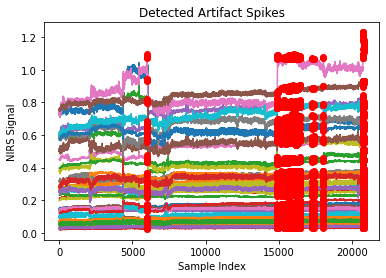

IndexError: index 20825 is out of bounds for axis 0 with size 20825

In [ ]:
import numpy as np

# Load NIRS data from file


# Calculate mean and standard deviation of NIRS signal
mean_signal = np.mean(nirs_data)
std_signal = np.std(nirs_data)

# Set threshold based on standard deviation
threshold = mean_signal + 3 * std_signal  # set threshold at 3 standard deviations above the mean


artifact_indices = np.where(nirs_data > threshold)[0]

# Plot detected artifact spikes
plt.plot(nirs_data)
plt.plot(artifact_indices, nirs_data[artifact_indices], 'ro')
plt.title('Detected Artifact Spikes')
plt.xlabel('Sample Index')
plt.ylabel('NIRS Signal')
plt.show()

# Correct artifact spikes using linear interpolation
nirs_data_corrected = np.copy(nirs_data)
for index in artifact_indices:
    nirs_data_corrected[index] = np.mean([nirs_data_corrected[index-1], nirs_data_corrected[index+1]])

# Plot corrected NIRS data
plt.plot(nirs_data_corrected)
plt.title('Corrected NIRS Data')
plt.xlabel('Sample Index')
plt.ylabel('NIRS Signal')
plt.show()


In [ ]:
data1 = nirs_data[0]

In [ ]:
data11=nirs_data[0]
data2_mean = channel_means
data22_mean= channel_means

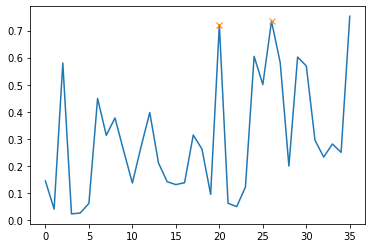

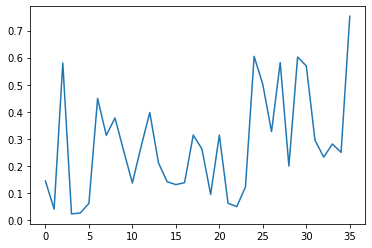

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
# Load NIRS data into numpy ndarray called 'data'
peaks, _ = find_peaks(data1)
prominences = peak_prominences(data1, peaks)[0]

# Use the median prominence to set the 'height' parameter for peak detection
#height = np.median(prominences) * 2 # adjust the multiplication factor as needed
height = np.max(prominences[prominences > np.percentile(prominences, 95)])

# Detect peaks in the data using the calculated 'height' parameter
peaks, _ = find_peaks(data1, height=height)

# Plot the data with detected peaks marked
plt.plot(data1)
plt.plot(peaks, data1[peaks], "x")
plt.show()

# Correct the spikes by replacing with the mean of surrounding data points
for peak in peaks:
    left_index = max(0, peak - 10) # adjust the range as needed
    right_index = min(len(data1) - 1, peak + 10)
    mean = np.mean(data1[left_index:right_index])
    data1[peak] = mean

# Plot the corrected data
plt.plot(data1)
plt.show()


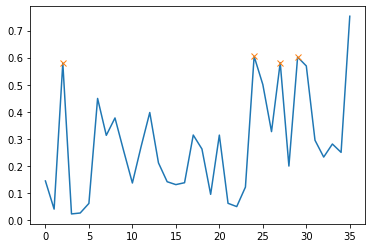

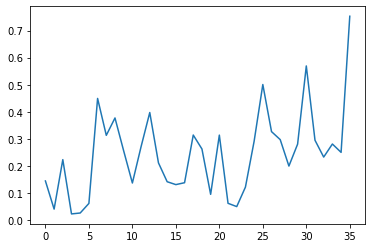

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
# Load NIRS data into numpy ndarray called 'data'

peaks, _ = find_peaks(data11)
prominences = peak_prominences(data11, peaks)[0]

# Use the median prominence to set the 'height' parameter for peak detection
height = np.median(prominences) * 2 # adjust the multiplication factor as needed
#height = np.max(prominences[prominences > np.percentile(prominences, 95)])

# Detect peaks in the data using the calculated 'height' parameter
peaks, _ = find_peaks(data11, height=height)

# Plot the data with detected peaks marked
plt.plot(data11)
plt.plot(peaks, data11[peaks], "x")
plt.show()

# Correct the spikes by replacing with the mean of surrounding data points
for peak in peaks:
    left_index = max(0, peak - 10) # adjust the range as needed
    right_index = min(len(data11) - 1, peak + 10)
    mean = np.mean(data11[left_index:right_index])
    data11[peak] = mean

# Plot the corrected data
plt.plot(data11)
plt.show()

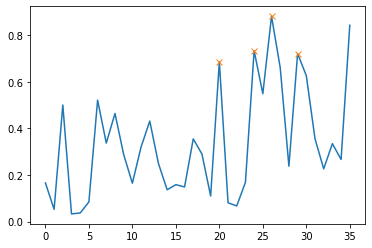

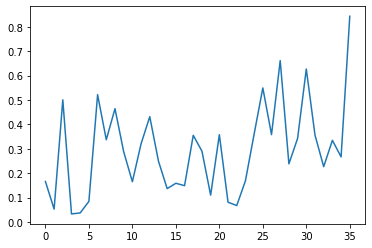

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
# Load NIRS data into numpy ndarray called 'data'
peaks, _ = find_peaks(data2_mean)
prominences = peak_prominences(data2_mean, peaks)[0]

# Use the median prominence to set the 'height' parameter for peak detection
#height = np.median(prominences) * 2 # adjust the multiplication factor as needed
height = np.max(prominences[prominences > np.percentile(prominences, 95)])

# Detect peaks in the data using the calculated 'height' parameter
peaks, _ = find_peaks(data2_mean, height=height)

# Plot the data with detected peaks marked
plt.plot(data2_mean)
plt.plot(peaks, data2_mean[peaks], "x")
plt.show()

# Correct the spikes by replacing with the mean of surrounding data points
for peak in peaks:
    left_index = max(0, peak - 10) # adjust the range as needed
    right_index = min(len(data2_mean) - 1, peak + 10)
    mean = np.mean(data2_mean[left_index:right_index])
    data2_mean[peak] = mean

# Plot the corrected data
plt.plot(data2_mean)
plt.show()

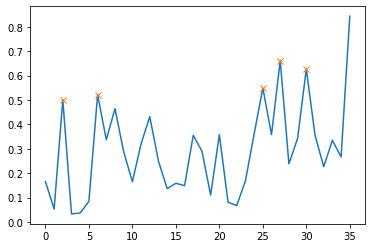

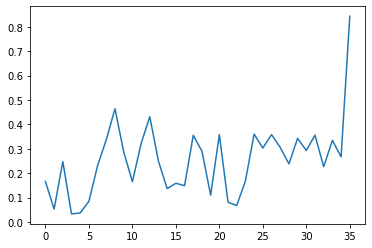

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
# Load NIRS data into numpy ndarray called 'data'

peaks, _ = find_peaks(data22_mean)
prominences = peak_prominences(data22_mean, peaks)[0]

# Use the median prominence to set the 'height' parameter for peak detection
height = np.median(prominences) * 2 # adjust the multiplication factor as needed
#height = np.max(prominences[prominences > np.percentile(prominences, 95)])

# Detect peaks in the data using the calculated 'height' parameter
peaks, _ = find_peaks(data22_mean, height=height)

# Plot the data with detected peaks marked
plt.plot(data22_mean)
plt.plot(peaks,data22_mean[peaks], "x")
plt.show()

# Correct the spikes by replacing with the mean of surrounding data points
for peak in peaks:
    left_index = max(0, peak - 10) # adjust the range as needed
    right_index = min(len(data22_mean) - 1, peak + 10)
    mean = np.mean(data22_mean[left_index:right_index])
    data22_mean[peak] = mean

# Plot the corrected data
plt.plot(data22_mean)
plt.show()